# MoCap Trajectory

In [ ]:
from imusim.all import *

In [19]:
from imusim.platforms.imus import Orient3IMU
from imusim.environment.base import Environment
from imusim.simulation.calibrators import ScaleAndOffsetCalibrator
from imusim.trajectories.rigid_body import SplinedBodyModel
from imusim.simulation.base import Simulation
from imusim.behaviours.imu import BasicIMUBehaviour

from imusim.testing.random_data import RandomTrajectory

from imusim.io.bvh import CM_TO_M_CONVERSION
from imusim.io.bvh import loadBVHFile

from imusim.visualisation.plotting import plot

In [2]:
model = loadBVHFile("/home/lisca/data/mocap/01_01.bvh", CM_TO_M_CONVERSION)
splinedModel = SplinedBodyModel(model)

In [3]:
splinedModel.startTime

0.03333332

In [4]:
splinedModel.endTime

22.89999084

In [5]:
env = Environment()

In [6]:
imu = Orient3IMU()
samples = 1000
rotationalVelocity = 20
samplingPeriod = 0.01
calibrator = ScaleAndOffsetCalibrator(env, samples, samplingPeriod, rotationalVelocity)
calibration = calibrator.calibrate(imu)

In [7]:
sim = Simulation(environment=env)

In [8]:
# r_ft_trjctr = splinedModel.getJoint('rFoot')
# r_ft_trjctr.name

In [9]:
imu.simulation = sim
imu.trajectory = splinedModel.getJoint('lFoot')

In [10]:
# splinedModel.jointNames

In [11]:
sim.time = splinedModel.startTime

In [12]:
BasicIMUBehaviour(imu, samplingPeriod, calibration, initialTime=sim.time)

In [13]:
sim.run(splinedModel.endTime)

Simulating...
Simulated 1.1s of 22.9s (  5%). Estimated time remaining 4.2s
Simulated 2.3s of 22.9s ( 10%). Estimated time remaining 3.9s
Simulated 3.4s of 22.9s ( 15%). Estimated time remaining 3.7s
Simulated 4.6s of 22.9s ( 20%). Estimated time remaining 3.5s
Simulated 5.7s of 22.9s ( 25%). Estimated time remaining 3.2s
Simulated 6.9s of 22.9s ( 30%). Estimated time remaining 3.0s
Simulated 8.0s of 22.9s ( 35%). Estimated time remaining 2.8s
Simulated 9.1s of 22.9s ( 40%). Estimated time remaining 2.6s
Simulated 10.3s of 22.9s ( 45%). Estimated time remaining 2.5s
Simulated 11.4s of 22.9s ( 50%). Estimated time remaining 2.2s
Simulated 12.6s of 22.9s ( 55%). Estimated time remaining 2.0s
Simulated 13.7s of 22.9s ( 60%). Estimated time remaining 1.9s
Simulated 14.9s of 22.9s ( 65%). Estimated time remaining 1.6s
Simulated 16.0s of 22.9s ( 70%). Estimated time remaining 1.5s
Simulated 17.1s of 22.9s ( 75%). Estimated time remaining 1.2s
Simulated 18.3s of 22.9s ( 80%). Estimated time r

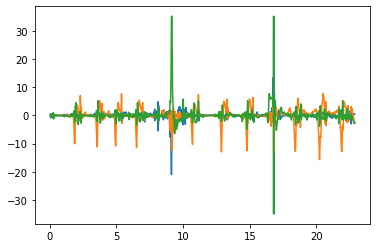

In [16]:
# figure()
# plot(imu.accelerometer.calibratedMeasurements.timestamps, imu.accelerometer.calibratedMeasurements.values)
plot(imu.gyroscope.calibratedMeasurements.timestamps, imu.gyroscope.calibratedMeasurements.values)
# title("Accelerometer Readings")
# xlabel("Time (s)")
# ylabel("Acceleration (m/s^2)")
# legend()

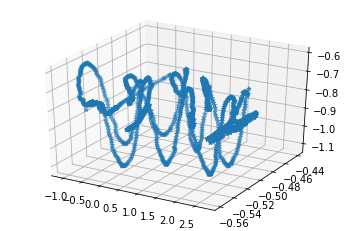

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

trim = 2000

x = model.positionKeyFrames.values[0][:trim]
y = model.positionKeyFrames.values[1][:trim]
z = model.positionKeyFrames.values[2][:trim]

ax.scatter(x, y, z, marker="*")

plt.show()

# Random Trajectory

Simulating...
Simulated 0.1s of 1.8s (  5%). Estimated time remaining 0.1s
Simulated 0.2s of 1.8s ( 10%). Estimated time remaining 0.1s
Simulated 0.3s of 1.8s ( 15%). Estimated time remaining 0.1s
Simulated 0.4s of 1.8s ( 20%). Estimated time remaining 0.1s
Simulated 0.5s of 1.8s ( 25%). Estimated time remaining 0.1s
Simulated 0.5s of 1.8s ( 30%). Estimated time remaining 0.1s
Simulated 0.6s of 1.8s ( 35%). Estimated time remaining 0.1s
Simulated 0.7s of 1.8s ( 40%). Estimated time remaining 0.1s
Simulated 0.8s of 1.8s ( 45%). Estimated time remaining 0.1s
Simulated 0.9s of 1.8s ( 50%). Estimated time remaining 0.1s
Simulated 1.0s of 1.8s ( 55%). Estimated time remaining 0.1s
Simulated 1.1s of 1.8s ( 60%). Estimated time remaining 0.1s
Simulated 1.2s of 1.8s ( 65%). Estimated time remaining 0.1s
Simulated 1.3s of 1.8s ( 70%). Estimated time remaining 0.0s
Simulated 1.4s of 1.8s ( 75%). Estimated time remaining 0.0s
Simulated 1.4s of 1.8s ( 80%). Estimated time remaining 0.0s
Simulated 

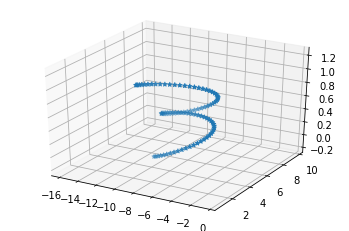

In [20]:
from imusim.all import *

env = Environment()

imu = Orient3IMU()
samples = 1000
samplingPeriod = 0.01
rotationalVelocity = 20
calibrator = ScaleAndOffsetCalibrator(env, samples, samplingPeriod, rotationalVelocity)
calibration = calibrator.calibrate(imu)

sim = Simulation(environment=env)

imu.simulation = sim
trj_rnd = RandomTrajectory()
imu.trajectory = trj_rnd # splinedModel.getJoint('lFoot')

sim.time = trj_rnd.startTime # splinedModel.startTime

BasicIMUBehaviour(imu, samplingPeriod, calibration, initialTime=sim.time)

sim.run(trj_rnd.endTime)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = trj_rnd.positionKeyFrames.values[0]
y = trj_rnd.positionKeyFrames.values[1]
z = trj_rnd.positionKeyFrames.values[2]

ax.scatter(x, y, z, marker="*")

plt.show()

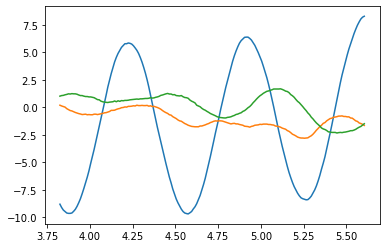

In [21]:
plot(imu.gyroscope.calibratedMeasurements.timestamps, imu.gyroscope.calibratedMeasurements.values)

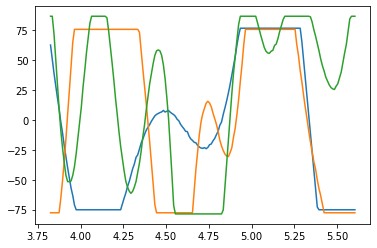

In [22]:
plot(imu.accelerometer.calibratedMeasurements.timestamps, imu.accelerometer.calibratedMeasurements.values)

In [23]:
rnd_trj = RandomTrajectory()
trj_pstn_vls = rnd_trj.positionKeyFrames.values
trj_rttn_vls = rnd_trj.rotationKeyFrames.values

In [24]:
trj_pstn_vls.shape

(3, 101)

In [25]:
trj_rttn_vls.array.shape

(101, 4)